# UNAD
## Andres Camilo Ariza Vargas
## Agrupamiento con Hierarchical Clustering

## Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
4. Entrenar el modelo configurando los diferentes hiperparámetros.
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenidos.

## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [41]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_samples, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [206]:
# Lectura de datos en Python
Datos = pd.read_csv('./Analisis_Datos/Dataset_Hierarchical_Clustering/Mall_Customers.csv')


# lectura de datos para el análisis ecploratorio
Datos.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [208]:
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [210]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Text(0.5, 1.0, 'Identifficación de Datos Faltantes y Atípicos - Age')

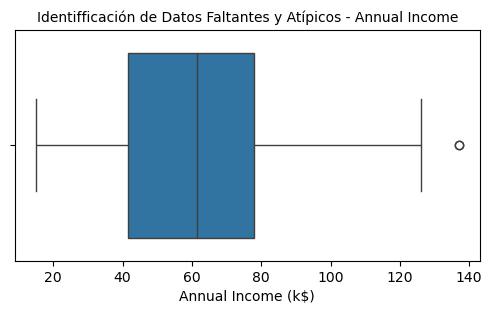

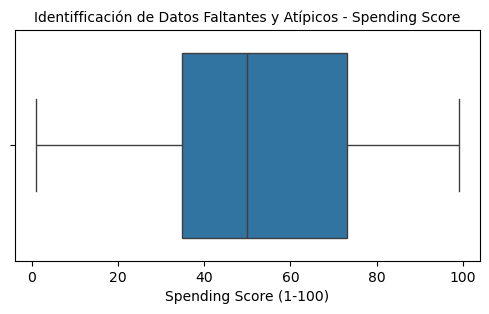

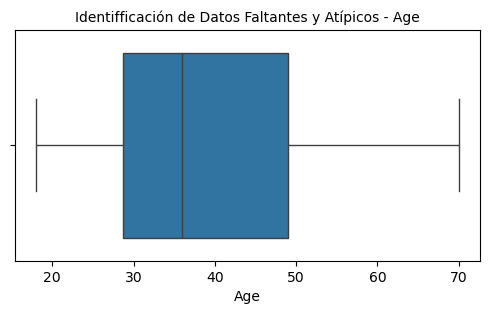

In [212]:
# Identificación de Datos Atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identifficación de Datos Faltantes y Atípicos - Annual Income', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identifficación de Datos Faltantes y Atípicos - Spending Score', fontsize=10)

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identifficación de Datos Faltantes y Atípicos - Age', fontsize=10)

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [214]:
# Identificar columnas con datos faltantes
print(Datos.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [216]:
# Conteo de datos atípicos

nivel_minimo_annual_income = 10
nivel_maximo_annual_income = 90
total_atipicos_annual_income = ((Datos['Annual Income (k$)']<nivel_minimo_annual_income)|(Datos['Annual Income (k$)']>nivel_maximo_annual_income)).sum()
print("El total de datos atípicos en Annual Income es {}".format(total_atipicos_annual_income))

nivel_minimo_spending_score = 10
nivel_maximo_spending_score = 100
total_atipicos_spending_score = ((Datos['Spending Score (1-100)']<nivel_minimo_spending_score)|(Datos['Spending Score (1-100)']>nivel_maximo_spending_score)).sum()
print("El total de datos atípicos en Spending Score es {}".format(total_atipicos_spending_score))

El total de datos atípicos en Annual Income es 22
El total de datos atípicos en Spending Score es 14


In [218]:
# Filtrar Datos Atípicos

Datos=Datos[(Datos['Annual Income (k$)']<nivel_maximo_annual_income)&(Datos['Annual Income (k$)']>nivel_minimo_annual_income)]
Datos=Datos[(Datos['Spending Score (1-100)']<nivel_maximo_spending_score)&(Datos['Spending Score (1-100)']>nivel_minimo_spending_score)]

In [220]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 163 entries, 0 to 177
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              163 non-null    int64 
 1   Gender                  163 non-null    object
 2   Age                     163 non-null    int64 
 3   Annual Income (k$)      163 non-null    int64 
 4   Spending Score (1-100)  163 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.6+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

Características de interés para el agrupamiento:

 * Age
 * Annual Income
 * Spending Score

In [222]:
# Filtrar columnas del modelo

Datos=Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

#Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
3,23,16,77
4,31,17,40
5,22,17,76
7,23,18,94
9,30,19,72
10,67,19,14
11,35,19,99
12,58,20,15


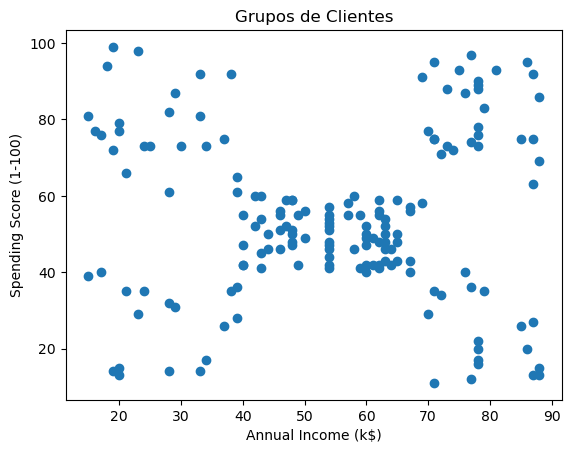

In [224]:
# Gráficas antes del agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

## 4. Entrenar el modelo configurando los diferentes hiperparámetros.

In [226]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

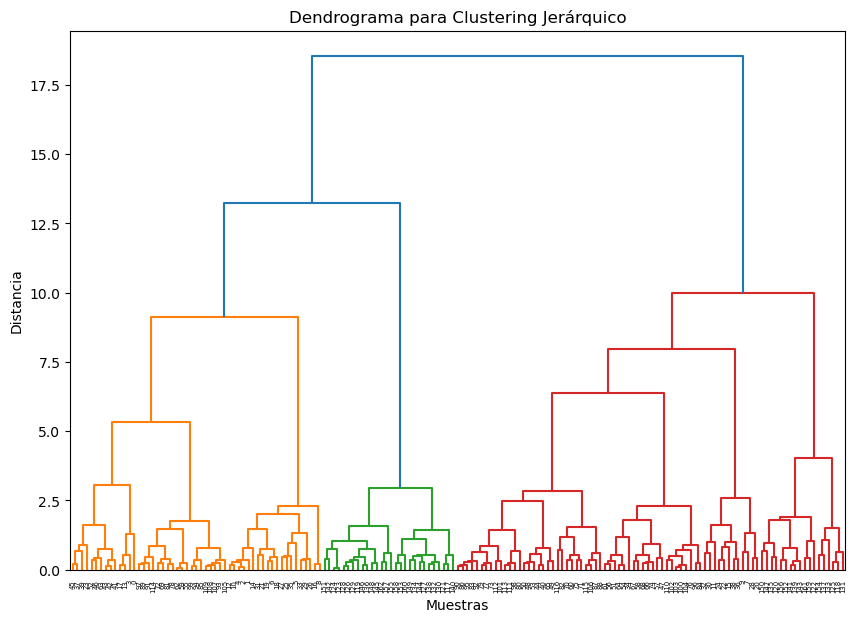

In [228]:
# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [230]:
# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datos[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.3791928605160875
Índice de Calinski-Harabasz: 90.30919731708968
Índice de Davies-Bouldin: 0.9732164778536486


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

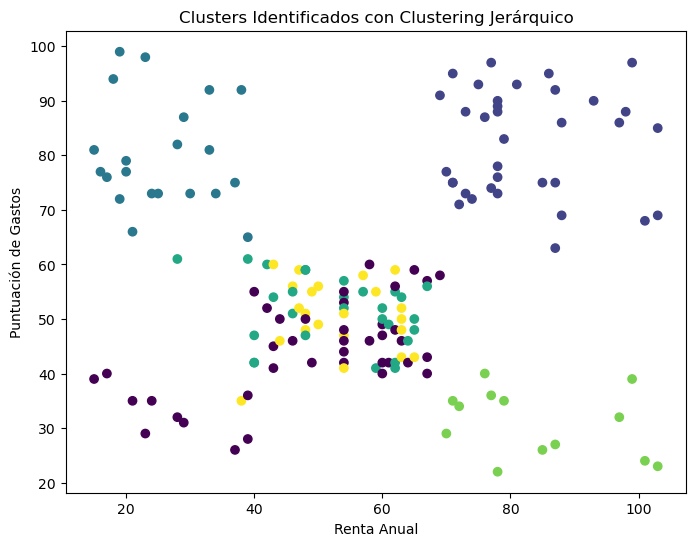

In [204]:
# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datos['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Renta Anual')
plt.ylabel('Puntuación de Gastos')
plt.show()

Silhouette Score: 0.41793080408830346


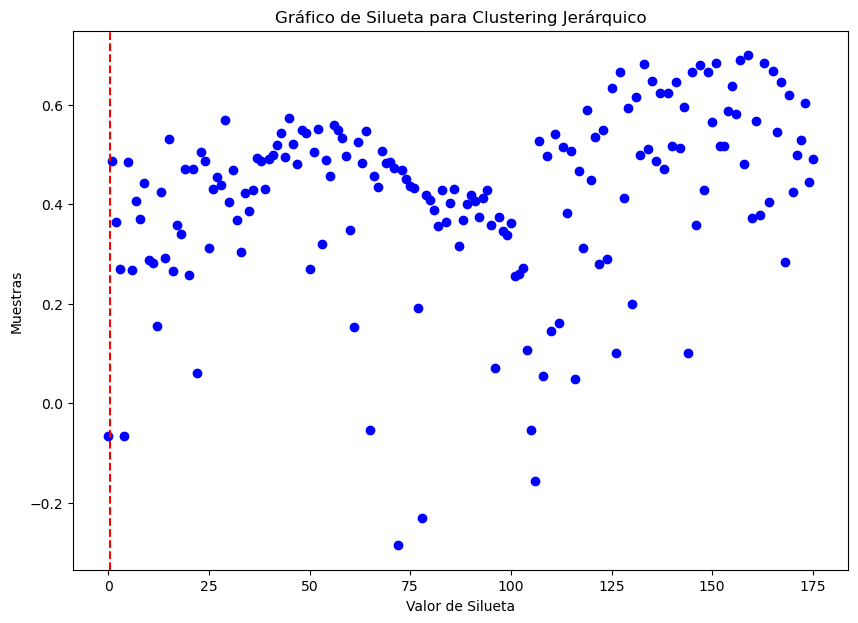

In [160]:
# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

## 7. Interpretar, analizar y documentar los resultados obtenidos.

Del desempeño del modelo se puede describir:

* Coeficiente de Silhouette:
    * La puntuación de Silhouette es de aproximadamente 0.379, lo que indica una débil separación entre los grupos. Esto sugiere que los clusters no están claramente definidos, con una probable superposición significativa entre ellos. Una puntuación más cercana a 1 sería ideal, ya que reflejaría una mayor claridad en la agrupación.
 


* Índice de Calinski-Harabasz:
    * La puntuación de Calinski-Harabasz es de 90.31, lo cual es baja en comparación con valores que indican clusters bien definidos. Esto implica que la dispersión dentro de los clusters es considerable y la separación entre ellos es limitada. Una puntuación más alta en esta métrica generalmente indica una estructura más robusta en los clusters.



* Índice Davies-Bouldin:
    * La puntuación de Davies-Bouldin es de 0.973, lo que indica un nivel moderado de similitud entre los clusters. Aunque está por debajo de 1, lo cual es positivo, un valor más bajo sería ideal para reflejar una separación más clara y una mejor compactación dentro de los grupos. Este valor sugiere que los clusters están definidos con cierta ambigüedad.

### Conclusión:
El modelo presenta clusters con una calidad limitada en términos de separación y definición. Las métricas indican que hay una estructura subyacente débil, pero también un margen considerable para mejoras. La configuración actual del modelo puede no ser la más adecuada para los datos, por lo que sería útil optimizar parámetros como el método de enlace, el número de clusters o considerar otras técnicas de clustering.









